In [44]:
!pip install matplotlib
!pip install seaborn

In [87]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [117]:
pokemon=pd.read_csv('pokemon.csv',index_col='#')
vs=pd.read_csv('train.csv',index_col=0)
vs2=pd.read_csv('test.csv',index_col=0)

Text(0.42499999999999716, 0.5, 'numero pokemon leggendari')

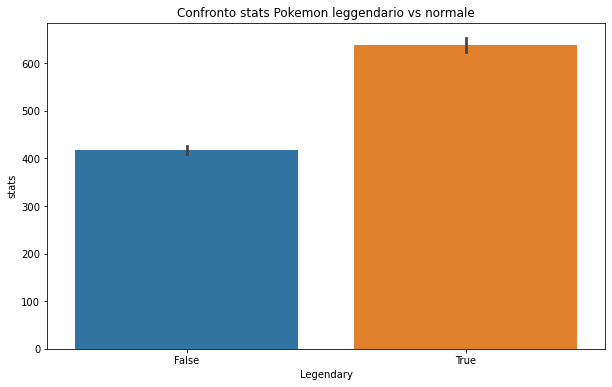

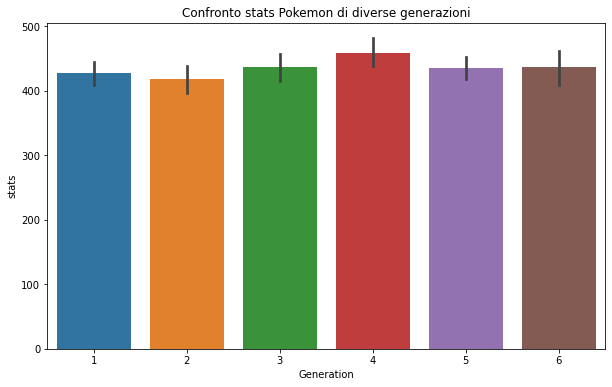

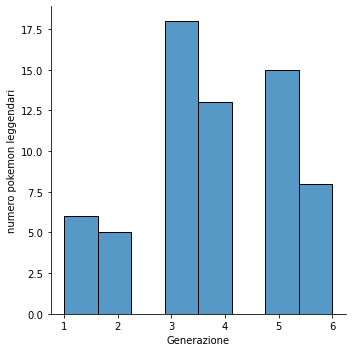

In [121]:
plt.figure(figsize=(10,6))
plt.title("Confronto stats Pokemon leggendario vs normale")
plt.ylabel("stats")
sns.barplot(x=pokemon['Legendary'], y=pokemon['HP']+pokemon['Attack']+pokemon['Defense']+pokemon['Sp. Atk']+pokemon['Sp. Def']+pokemon['Speed'])
plt.figure(figsize=(10,6))
plt.title("Confronto stats Pokemon di diverse generazioni")
plt.ylabel("stats")
sns.barplot(x=pokemon['Generation'], y=pokemon['HP']+pokemon['Attack']+pokemon['Defense']+pokemon['Sp. Atk']+pokemon['Sp. Def']+pokemon['Speed'])
xs =  pokemon[pokemon['Legendary']==True]
xs.reset_index(drop=True, inplace=True)
sns.displot(data=xs['Generation'],kde=False)
plt.xlabel("Generazione")
plt.ylabel("numero pokemon leggendari")

# E' dunque evidente la correlazione tra le statistiche di un pokemon e il suo essere leggendario. Tutti i pokemon leggendari hanno sempre avuto stats maggiorate rispetto ai pokemon normali, infatti il primo grafico evidenzia proprio questo. Da qui possiamo dunque procedere con l'eliminazione della feature 'Legendary' in quanto le statistiche (hp, atk,def,Sp.atk ecc) contengono già implicitamente questa informazione che non ci aggiungerebbe nessuna info utile. Discorso simile per le generazioni,infatti l'appartenenza ad una determinata generazione non incide in maniera determinante sulla 'forza' dei pokemon ad essa appartenenti, il secondo grafico ci mostra come le stats siano piuttosto equilibrate tra le varie generazioni. Nel terzo è mostrato il numero dei pokemon leggendari per ogni generazione e come si può vedere le generazioni con più stats del secondo grafico sono quelle che hanno anche più leggendari il che livella tutto ancor di più.


In [123]:
#eliminiamo dunque le colonne non utili
pokemon=pokemon.drop('Legendary',1)
pokemon=pokemon.drop('Generation',1)
#avendo l'id ('#') il nome del pokemon è inutile
pokemon=pokemon.drop('Name',1)
#alcuni pokemon sono dotati di un solo tipo, per questo utilizziamo fillna 
#per assegnare a tutti i valori Nan del Type 2 lo stesso valore del Type 1
#in modo da avere sempre due tipi. [fuoco/Nan]->[fuoco/fuoco]
pokemon['Type 2']=pokemon['Type 2'].fillna(pokemon['Type 1'])
#trasformiamo i valori dei Type in array OneHot
y = pd.get_dummies(pd.Series(data=pokemon['Type 1'])).to_numpy().tolist()
k = pd.get_dummies(pd.Series(data=pokemon['Type 2'])).to_numpy().tolist()
x= pokemon.drop('Type 1', 1)
x=x.drop('Type 2', 1)
pokemon = pd.DataFrame(data = x, columns =x.columns)
pokemon['Type 1'] = pd.Series(y).to_numpy()
pokemon['Type 2'] = pd.Series(k).to_numpy()
pokemon

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
#,,,,,,,,
1,45,49,49,65,65,45,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,60,62,63,80,80,60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,80,82,83,100,100,80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,80,100,123,122,120,80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
5,39,52,43,60,50,65,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
796,50,100,150,100,150,50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
797,50,160,110,160,110,110,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
798,80,110,60,150,130,70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


# 'terminato' con la modifica del dataframe pokemon bisogna ora unirlo al dataframe vs (combats). Iniziamo con prendere la lista degli id dei pokemon combattenti e creiamo un dizionario del dataframe pokemon da cui estraiamo le chiavi sottoforma di lista.

In [124]:
lista= vs['First_pokemon'].tolist()
lista2=vs['Second_pokemon'].tolist()
dict=pokemon.to_dict()
col=[]
for i in dict.keys():
    col.append(i)
#iteriamo sulle chiavi del dizionario(le colonne del dataframe pokemon), inizializziamo 3 liste.
for k in col:
    new_col=[]
    new_col2=[]
    diff=[]
    
    for j in lista:
        new_col.append(dict[k][j])
    for w in lista2:   
        new_col2.append(dict[k][w])    
    if (k != 'Type 1') and (k!= 'Type 2'):
        for z in range(len(new_col)):
            diff.append(new_col[z]- new_col2[z])
        vs['Diff: '+k] = pd.Series(diff,dtype='int32')
    else:
            vs['Pok 1: '+k] = pd.Series(new_col).to_numpy()
            vs['Pok 2: '+k] = pd.Series(new_col2).to_numpy()
#in sintesi,associamo in vs, tutte le  info dei pokemon tramite le chiavi del dizionario 
#e basandoci sull'id(di entrambi i pokemon combattenti) andiamo a calcolare la differenza 
#tra le statistiche dei due pokemon e invece riportando semplicemente i tipi per ognuno dei pokemon combattenti,
#in questo modo abbiamo ridotto il numero di colonne del nostro dataframe a 13 
#(senza differenza tra statistiche avremmo avuto 19 colonne)
vs.head()

,Winner,First_pokemon,Second_pokemon,Diff: HP,Diff: Attack,Diff: Defense,Diff: Sp. Atk,Diff: Sp. Def,Diff: Speed,Pok 1: Type 1,Pok 2: Type 1,Pok 1: Type 2,Pok 2: Type 2
0,256,389,256,-15,5,55,-5,55,-10,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,129,129,319,-4,21,22,-6,37,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,642,642,346,-8,1,-3,1,-3,15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,248,248,320,-29,-1,-13,19,7,27,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
4,212,212,658,-5,-12,0,33,35,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# ora non ci resta che trasformare il valore 'winner' in un valore binario dove se il vincitore è il pokemon 1 allora winner sarà = 0 altrimenti con la vittoria del pokemon 2 winner sarà=1.

In [109]:
win=vs['Winner'].tolist()
win_transform=[]
for z in range(len(win)):
        if win[z]==lista[z]:
            win_transform.append(0)
        else:
            win_transform.append(1)
vs= vs.drop('Winner',1)
vs['Winner'] = pd.Series(win_transform)
vs.head()

,First_pokemon,Second_pokemon,Diff: HP,Diff: Attack,Diff: Defense,Diff: Sp. Atk,Diff: Sp. Def,Diff: Speed,Pok 1: Type 1,Pok 2: Type 1,Pok 1: Type 2,Pok 2: Type 2,Winner
0,389,256,-15,5,55,-5,55,-10,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,129,319,-4,21,22,-6,37,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0
2,642,346,-8,1,-3,1,-3,15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0
3,248,320,-29,-1,-13,19,7,27,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0
4,212,658,-5,-12,0,33,35,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


# Stessa cosa va fatta anche per il test set

In [110]:
lista= vs2['First_pokemon'].tolist()
lista2=vs2['Second_pokemon'].tolist()
dict=pokemon.to_dict()
col=[]
for i in dict.keys():
    col.append(i)

for k in col:
    new_col=[]
    new_col2=[]
    diff=[]
    
    for j in lista:
        new_col.append(dict[k][j])
    for w in lista2:   
        new_col2.append(dict[k][w])    
    if (k != 'Type 1') and (k!= 'Type 2'):
        for z in range(len(new_col)):
            diff.append(new_col[z]- new_col2[z])
        vs2['Diff: '+k] = pd.Series(diff,dtype='int32')
    else:
            vs2['Pok 1: '+k] = pd.Series(new_col).to_numpy()
            vs2['Pok 2: '+k] = pd.Series(new_col2).to_numpy()

win=vs2['Winner'].tolist()
win_transform=[]
for z in range(len(win)):
        if win[z]==lista[z]:
            win_transform.append(0)
        else:
            win_transform.append(1)
vs2= vs2.drop('Winner',1)
vs2['Winner'] = pd.Series(win_transform)
vs2.head()

,First_pokemon,Second_pokemon,Diff: HP,Diff: Attack,Diff: Defense,Diff: Sp. Atk,Diff: Sp. Def,Diff: Speed,Pok 1: Type 1,Pok 2: Type 1,Pok 1: Type 2,Pok 2: Type 2,Winner
0,328,450,-10,0,76,25,66,-40,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,351,790,35,-47,-149,26,-11,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0
2,83,130,50,75,75,-15,10,-40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,485,764,-14,-49,-2,-96,-3,-36,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,221,332,15,0,0,10,10,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


# separiamo ora il target della nostra previsione, ovvero winner, dai nostri train e test ed eliminiamo le ormai inutili colonne riguardanti l'id dei pokemon.

In [111]:
y_train=vs['Winner']
y_test=vs2['Winner']
x_train=vs.drop('Winner',1)
x_test=vs2.drop('Winner',1)
x_train=x_train.drop('First_pokemon',1)
x_test=x_test.drop('First_pokemon',1)
final_train=x_train.drop('Second_pokemon',1)
final_test=x_test.drop('Second_pokemon',1)
final_train.to_csv('new_train.csv')
final_test.to_csv('new_test.csv')
x_train=pd.read_csv('new_train.csv',index_col=0)
x_test=pd.read_csv('new_test.csv',index_col=0)

# andiamo a rendere addestrabile il dataframe tramite trasformazione scalare e ad addestrare la rete tramite il classificatore RandomForest. Questo algo utilizza una media degli alberi decisionali(n_estimators) prodotti per avere così una stima molto più accurata rispetto ad un singolo albero decisionale che sarebbe molto impreciso.

In [114]:
df1=pd.get_dummies(x_train)
df2=pd.get_dummies(x_test)
df1 = StandardScaler().fit_transform(df1)
df2 = StandardScaler().fit_transform(df2)
rfc = RandomForestClassifier(n_estimators=100).fit(df1,y_train)
print("Test set predictions:", rfc.predict(df2))
print("Test set accuracy: {:.4f}".format(rfc.score(df2, y_test)*100) +' %')

Test set predictions: [1 0 1 ... 0 1 1]
Test set accuracy: 94.9394 %


# creiamo una lista in cui avremo il valore 0.0 se il classificatore ha sbagliato a predire e il valore e 1.0 se ha predetto correttamente. Il Grafico riassume tutto ciò.

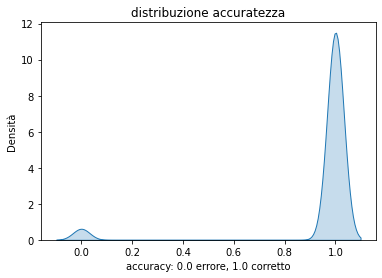

In [115]:
pred=rfc.predict(df2).tolist()
true=y_test.tolist()
bool_list=[]
for i in range(len(true)):
    if true[i]==pred[i]:
        bool_list.append(1.0)
    else:
        bool_list.append(0.0)
        
sns.kdeplot(data=bool_list,shade=True)
plt.title("distribuzione accuratezza")
plt.xlabel("accuracy: 0.0 errore, 1.0 corretto")
plt.ylabel("Densità")
plt.show()